In [127]:
%pip install matplotlib nbformat numpy pandas plotly scipy

Note: you may need to restart the kernel to use updated packages.


In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objects as go

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from pathlib import Path
from scipy.interpolate import griddata

In [129]:
# RootPath = Path(__file__).parent.parent
RootPath = Path(globals()["_dh"][0]).parent

In [130]:
# Configure imported packages
plotly.offline.init_notebook_mode()

# Prelude

In [131]:
def surfacedata(df, xlabel, ylabel, zlabel, method="linear"):
    x, y, z = df[xlabel], df[ylabel], df[zlabel]
    x1 = np.linspace(x.min(), x.max(), len(x.unique()))
    y1 = np.linspace(y.min(), y.max(), len(y.unique()))
    x2, y2 = np.meshgrid(x1, y1)
    z2 = griddata((x, y), z, (x2, y2), method=method)
    return (x2, y2, z2)

In [132]:
default_backend = "matplotlib"
default_colormap = {"Fast": "viridis", "Safe": "magma"}


def surfaceplot(
    df,
    xlabel,
    ylabel,
    zlabel,
    alabel,
    title=None,
    backend=default_backend,
    method="linear",
    colormap=default_colormap,
):
    if backend == "plotly":
        fig = go.Figure(layout_width=800, layout_height=800)
        for arank, avalue in enumerate(df[alabel].unique()):
            df_ax = df[df[alabel] == avalue]
            x, y, z = surfacedata(df_ax, xlabel, ylabel, zlabel)
            fig.add_trace(
                go.Surface(
                    name=avalue,
                    x=x,
                    y=y,
                    z=z,
                    colorscale=colormap[avalue],
                    legendrank=arank,
                    showscale=False,
                    showlegend=True,
                )
            )
        fig.update_layout(
            title=dict(text=title),
            scene=dict(
                xaxis_title=xlabel,
                yaxis_title=ylabel,
                zaxis=dict(title=zlabel, showexponent="all", exponentformat="e"),
            ),
        )
        fig.show()
    if backend == "matplotlib":
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        for arank, avalue in enumerate(df[alabel].unique()):
            df_ax = df[df[alabel] == avalue]
            x, y, z = surfacedata(df_ax, xlabel, ylabel, zlabel)
            ax.plot_surface(x, y, z)
        plt.show()

# CPU Time

In [133]:
df_time = pd.read_csv(RootPath / "data" / "bench-time.csv")
df_time = df_time.drop(columns=["MeanLB", "MeanUB", "Stddev", "StddevLB", "StddevUB"])
df_time = df_time.join(
    df_time["Name"]
    .str.split("/", n=3, expand=True)
    .rename(columns={0: "Module", 1: "Function", 2: "Variant", 3: "Parameters"})
)
df_time = df_time.drop(columns=["Name"])

# Plot mean CPU time for evaluating `thin i j`

In [ ]:
df_time_thin = df_time.loc[df_time["Function"] == "thin"]
df_time_thin = df_time_thin.join(
    df_time_thin["Parameters"]
    .str.extract(r"\[(\d+),(\d+)\]", expand=True)
    .rename(columns={0: "i", 1: "j"})
)
df_time_thin = df_time_thin.drop(columns=["Parameters"])
df_time_thin["i"] = df_time_thin["i"].apply(int)
df_time_thin["j"] = df_time_thin["j"].apply(int)

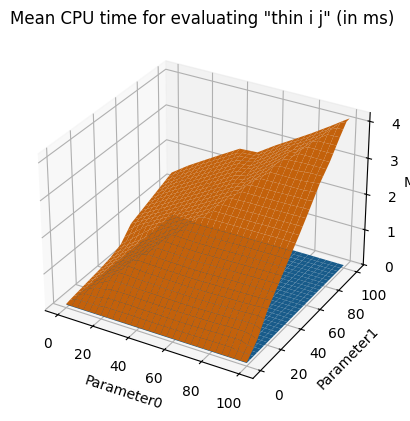

In [ ]:
surfaceplot(
    title='Mean CPU time for evaluating "thin i j" (in ms)',
    df=df_time_thin,
    xlabel="i",
    ylabel="j",
    zlabel="Mean",
    alabel="Variant",
)

# Plot mean CPU time for evaluating `thick i j`

In [ ]:
df_time_thick = df_time.loc[df_time["Function"] == "thick"]
df_time_thick = df_time_thick.join(
    df_time_thick["Parameters"]
    .str.extract(r"\[(\d+),(\d+)\]", expand=True)
    .rename(columns={0: "i", 1: "j"})
)
df_time_thick = df_time_thick.drop(columns=["Parameters"])
df_time_thick["i"] = df_time_thick["i"].apply(int)
df_time_thick["j"] = df_time_thick["j"].apply(int)

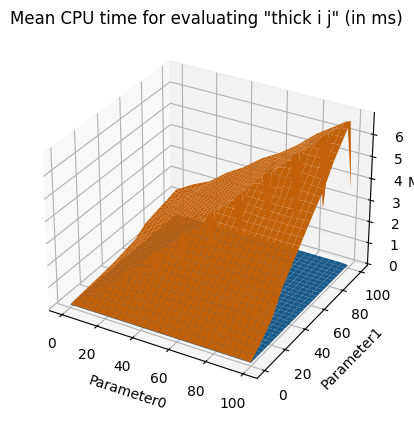

In [ ]:
surfaceplot(
    title='Mean CPU time for evaluating "thick i j" (in ms)',
    df=df_time_thick,
    xlabel="i",
    ylabel="j",
    zlabel="Mean",
    alabel="Variant",
)

# Memory Usage

In [138]:
df_space = pd.read_csv(RootPath / "data" / "bench-space.csv", skiprows=[0])
df_space = df_space.drop(columns=["GCs", "LiveBytes", "MaxOSBytes", "WallTime"])
df_space = df_space.join(
    df_space["Label"]
    .str.split("/", n=4, expand=True)
    .rename(
        columns={0: "Root", 1: "Module", 2: "Function", 3: "Variant", 4: "Parameters"}
    )
)
df_space = df_space.drop(columns=["Label"])

# Plot allocated bytes for evaluating `thin i j`

In [ ]:
df_space_thin = df_space.loc[df_space["Function"] == "thin"]
df_space_thin = df_space_thin.join(
    df_space_thin["Parameters"]
    .str.extract(r"\[(\d+),(\d+)\]", expand=True)
    .rename(columns={0: "i", 1: "j"})
)
df_space_thin = df_space_thin.drop(columns=["Parameters"])
df_space_thin["i"] = df_space_thin["i"].apply(int)
df_space_thin["j"] = df_space_thin["j"].apply(int)

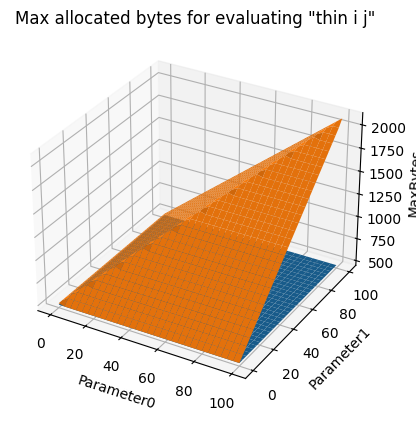

In [ ]:
surfaceplot(
    title='Max allocated bytes for evaluating "thin i j"',
    df=df_space_thin,
    xlabel="i",
    ylabel="j",
    zlabel="MaxBytes",
    alabel="Variant",
)

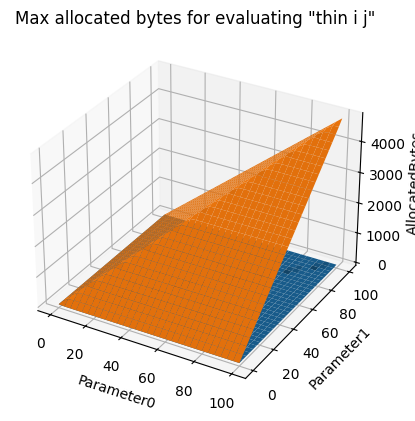

In [ ]:
surfaceplot(
    title='Max allocated bytes for evaluating "thin i j"',
    df=df_space_thin,
    xlabel="i",
    ylabel="j",
    zlabel="AllocatedBytes",
    alabel="Variant",
)

# Plot allocated bytes for evaluating `thick i j`

In [ ]:
df_space_thick = df_space.loc[df_space["Function"] == "thick"]
df_space_thick = df_space_thick.join(
    df_space_thick["Parameters"]
    .str.extract(r"\[(\d+),(\d+)\]", expand=True)
    .rename(columns={0: "i", 1: "j"})
)
df_space_thick = df_space_thick.drop(columns=["Parameters"])
df_space_thick["i"] = df_space_thick["i"].apply(int)
df_space_thick["j"] = df_space_thick["j"].apply(int)


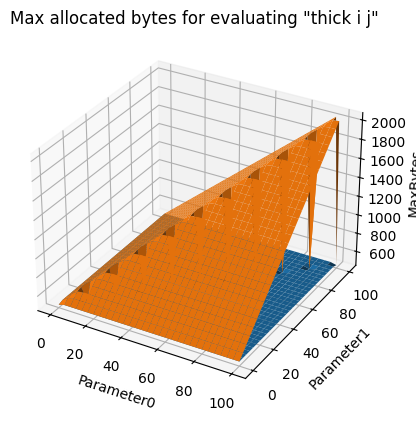

In [ ]:
surfaceplot(
    title='Max allocated bytes for evaluating "thick i j"',
    df=df_space_thick,
    xlabel="i",
    ylabel="j",
    zlabel="MaxBytes",
    alabel="Variant",
)

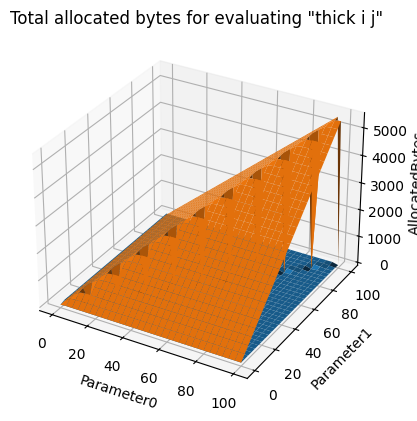

In [ ]:
surfaceplot(
    title='Total allocated bytes for evaluating "thick i j"',
    df=df_space_thick,
    xlabel="i",
    ylabel="j",
    zlabel="AllocatedBytes",
    alabel="Variant",
)